<a href="https://colab.research.google.com/github/ah20776/CE903-Group-Project/blob/main/Codes/CE903_Team5_Ajay_Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ah20776/CE903-Group-Project.git

fatal: destination path 'CE903-Group-Project' already exists and is not an empty directory.


**Pre-processing**

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv("/content/CE903-Group-Project/data/framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:

df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer as Imputer
mean_imputer = Imputer(strategy='mean')
mode_imputer = Imputer(strategy='most_frequent')

In [6]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2)

In [7]:

mean_imputer.fit(df[['glucose']])
df['glucose'] = mean_imputer.transform(df[['glucose']])
df.drop(['education'],axis=1,inplace=True)
df.head(3)
df.shape

(4240, 15)

In [8]:
df.dropna(inplace=True)
df.shape

(4090, 15)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1873dab690>,
      dtype=object)

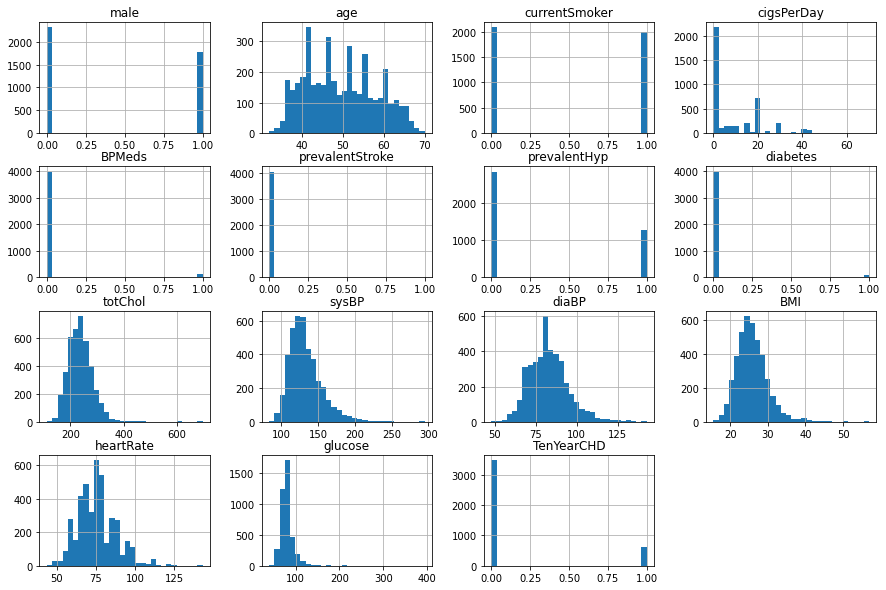

In [9]:
df.hist(bins=30, figsize=(15, 10))

In [10]:
dat = df["TenYearCHD"].value_counts()
print(dat)

0    3479
1     611
Name: TenYearCHD, dtype: int64


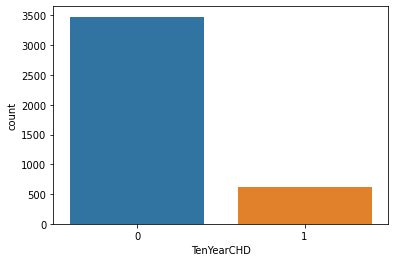

There are 3479 patients without heart disease and 611 patients with the disease


In [11]:
sns.countplot(x='TenYearCHD',data=df)
plt.show()
print("There are 3479 patients without heart disease and 611 patients with the disease")

In [12]:
df['glucose']

0        77.000000
1        76.000000
2        70.000000
3       103.000000
4        85.000000
           ...    
4234     68.000000
4236     81.963655
4237    107.000000
4238     72.000000
4239     80.000000
Name: glucose, Length: 4090, dtype: float64

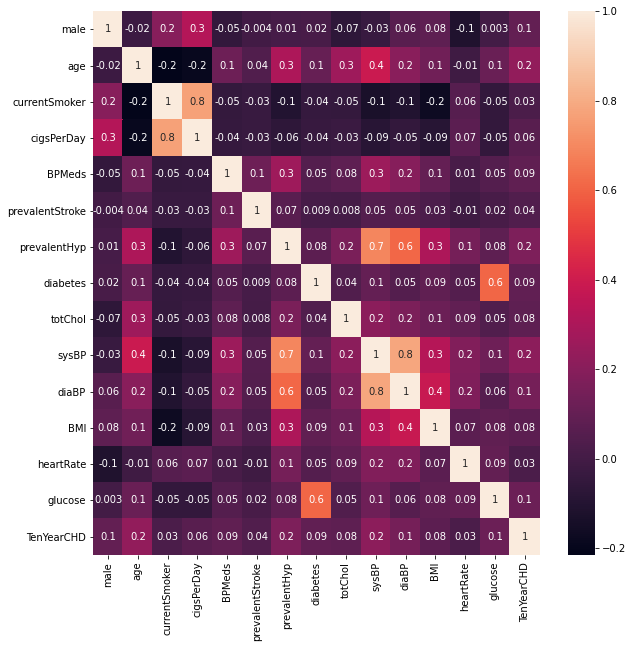

In [13]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, fmt='.1g')

In [14]:
!pip install boruta

In [15]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [16]:
#define the features
X = df.iloc[:,:-1].values
y = df["TenYearCHD"].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2,random_state=1)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=None,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=28, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x7F184E847490,
                                          verbose=0, warm_star

In [17]:
# check selected features
feat_selector.support_

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False])

In [18]:

# check ranking of features
feat_selector.ranking_

array([ 9,  1, 10,  7, 12, 13,  8, 11,  3,  1,  4,  2,  6,  4])

In [19]:
df.columns[:-1][feat_selector.support_].to_list()

['age', 'sysBP']

In [20]:
data = df.columns[:-1][feat_selector.ranking_ <=7].tolist()
data

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [21]:

X = df[data]
y = df["TenYearCHD"]

In [22]:
from imblearn.over_sampling import SMOTE

In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [24]:
sm = SMOTE(random_state=40)
X_sm, y_sm = sm.fit_resample(X, y)

# oversample = RandomOverSampler(sampling_strategy='minority')
# X_over, y_over = oversample.fit_resample(X, y)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.3,random_state =6)
# X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,test_size=0.3,random_state =6)

**KNeighborsClassifier**

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn_pred= knn.predict(X_test)
print("KNeighborsClassifier")
print('---------------------')
print('Accuracy: ',accuracy_score(y_test,knn_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,knn_pred))
print(classification_report(y_test, knn_pred))


KNeighborsClassifier
---------------------
Accuracy:  0.8318965517241379
Confusion Matrix: 
 [[ 706  325]
 [  26 1031]]
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      1031
           1       0.76      0.98      0.85      1057

    accuracy                           0.83      2088
   macro avg       0.86      0.83      0.83      2088
weighted avg       0.86      0.83      0.83      2088



**Naive Bayes**

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
nb_pred= nb.predict(X_test)
print("Naive Bayes")
print('---------------------')
print('Accuracy: ',accuracy_score(y_test,nb_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,nb_pred))
print(classification_report(y_test, nb_pred))

Naive Bayes
---------------------
Accuracy:  0.6024904214559387
Confusion Matrix: 
 [[798 233]
 [597 460]]
              precision    recall  f1-score   support

           0       0.57      0.77      0.66      1031
           1       0.66      0.44      0.53      1057

    accuracy                           0.60      2088
   macro avg       0.62      0.60      0.59      2088
weighted avg       0.62      0.60      0.59      2088



**Random Forest Classifier**

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred= rf.predict(X_test)
print("Random Forest Classifier")
print('---------------------')
print('Accuracy: ',accuracy_score(y_test,rf_pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Classifier
---------------------
Accuracy:  0.8673371647509579
Confusion Matrix: 
 [[866 165]
 [112 945]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1031
           1       0.85      0.89      0.87      1057

    accuracy                           0.87      2088
   macro avg       0.87      0.87      0.87      2088
weighted avg       0.87      0.87      0.87      2088



In [31]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


Best model is Random Forest Classifier. Trying to get it more accurate

In [34]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [36]:
from sklearn.model_selection import RandomizedSearchCV
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 29.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [37]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}